<a href="https://colab.research.google.com/github/kraken200/Twitter-sentiment-analysis/blob/main/Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
#data manipulation
import pandas as pd
import numpy as np
import re
import string

## methods and stopwords text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

##Machine learning libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#Visualization
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")



## **Stopwords**

In [ ]:
## creating a stopwords set
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('quot')
stop_words.add('amp')
stop_words.add('lt')
stop_words.add('gt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv('sentiment140.csv', encoding='latin-1')

## **Deleting unwanted columns**

In [ ]:
df.columns = ["target", "time", "date", "query", "username", "text"]

In [ ]:
df.head()

,target,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df=df[['target','text']]

In [ ]:
df

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


## **Taking a portion of the data**

In [ ]:
df_pos = df[df['target'] == 4]
df_neg = df[df['target'] == 0]

In [ ]:
df_pos = df_pos.iloc[:int(len(df_pos)/20)]
df_neg = df_neg.iloc[:int(len(df_neg)/20)]

In [ ]:
df = pd.concat([df_neg, df_pos])
len(df)

79999

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.dropna()

,index,target,text
0,0,0,is upset that he can't update his Facebook by ...
1,1,0,@Kenichan I dived many times for the ball. Man...
2,2,0,my whole body feels itchy and like its on fire
3,3,0,"@nationwideclass no, it's not behaving at all...."
4,4,0,@Kwesidei not the whole crew
...,...,...,...
79994,839994,4,Oficially done with drivers ed stuff. Now I ju...
79995,839995,4,@jimhunt Thank YOU for sharing and caring! Gl...
79996,839996,4,@buberzionist ok objection sustained
79997,839997,4,is twittin' while my baby girl sleeps


In [ ]:
df=df.drop(columns='index')

## **Cleaning and preprocessing the data**

In [ ]:
def preprocess_tweet_text(tweet):
# Runs a set of transformational steps to
# preprocess the text of the tweet.

  #convert all text lowercase
  tweet = tweet.lower()

  #remove any urls
  tweet = re.sub(r"http\St+|www\St+|https\S+","", tweet, flags=re.MULTILINE)

  #remove punctuations
  tweet = tweet.translate(str.maketrans("","",string.punctuation))


  # remove user @ references and '#' from tweet
  tweet = re.sub(r'\@\w+|\#', "", tweet)

  # remove stopwords
  tk = TweetTokenizer(reduce_len=True)
  tweet_tokens = tk.tokenize(tweet)
  filtered_words = [word for word in tweet_tokens if word not in stop_words]


  lemmatizer = WordNetLemmatizer()
  lemma_words=[]

  for word, tag in pos_tag(filtered_words):
    # First, we will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
    # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb.
    if tag.startswith('NN'):
        pos = 'n'
    elif tag.startswith('VB'):
        pos = 'v'
    else:
        pos = 'a'
    lemma_word=lemmatizer.lemmatize(word, pos)
    lemma_words.append(lemma_word)

  return lemma_words


In [ ]:
for i in range(len(df)-1):
  df['text'][i]=preprocess_tweet_text(str(df['text'][i]))

## **Visalizing the data**

In [ ]:
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

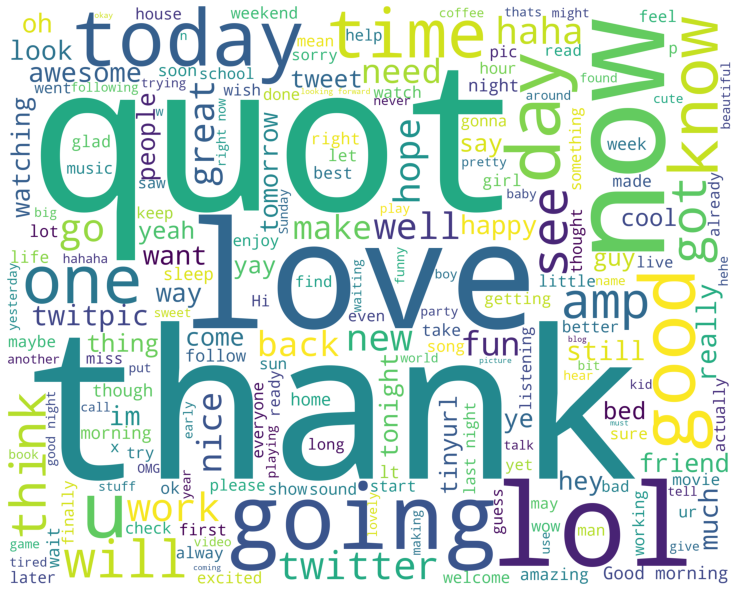

In [ ]:
wordcloud_draw(df_pos['text'],'white')

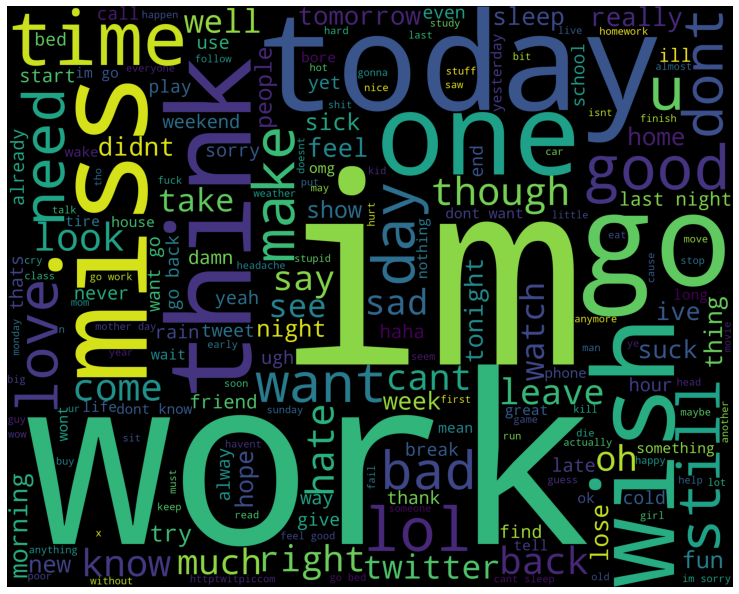

In [ ]:
wordcloud_draw(df_neg['text'],'black')

## **Getting data ready for models**

In [ ]:
def get_feature_vector(train_fit):
  vector = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
  vector.fit_transform(train_fit)
  return vector

In [ ]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['target'],test_size=0.3)

In [ ]:
#Data in present form can be used with scikitlearn models but nltk.scikitlearn models require the data to be in a dict like structure. Since nltk.scikitlearn has a number of useful methods we are going to use it.
cleaned_tokens_list=list(zip(X_train,y_train))
def list_to_dict(tokens):
    return dict([token, True] for token in tokens)

train_data = []

# Transforming the data to fit the input structure of the Nltk.Scikitlearn classifiers
for tokens, label in cleaned_tokens_list:
    train_data.append((list_to_dict(tokens), label))


In [ ]:
test_tokens_list=list(zip(X_test,y_test))
test_data=[]
for tokens, label in test_tokens_list:
    test_data.append((list_to_dict(tokens), label))

# **Train model**

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train_data)

In [ ]:
from nltk import classify
print(classify.accuracy(MNB_classifier,test_data))

0.754


In [ ]:
from nltk.tag.sequential import NaiveBayesClassifier
classifier=NaiveBayesClassifier.train(train_data)

In [ ]:
classifier.show_most_informative_features(30)

Most Informative Features
                   sadly = True                0 : 4      =     27.8 : 1.0
                  lonely = True                0 : 4      =     20.3 : 1.0
                  female = True                0 : 4      =     17.1 : 1.0
                   tummy = True                0 : 4      =     17.1 : 1.0
                    sick = True                0 : 4      =     16.2 : 1.0
                 welcome = True                4 : 0      =     15.5 : 1.0
                 depress = True                0 : 4      =     14.7 : 1.0
                    argh = True                0 : 4      =     13.0 : 1.0
                  throat = True                0 : 4      =     12.6 : 1.0
                    hurt = True                0 : 4      =     12.0 : 1.0
                  dammit = True                0 : 4      =     11.7 : 1.0
                    ache = True                0 : 4      =     11.4 : 1.0
                    booo = True                0 : 4      =     11.0 : 1.0

## **SVC**

In [ ]:
from sklearn.svm import SVC
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(final_data)

<SklearnClassifier(SVC())>

In [ ]:
print(classify.accuracy(SVC_classifier,test_data))

0.7632916666666667
